# Implementation Of Spam Filtering Using NLP  Concept and All Machine Learning Algorithms

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import nltk
import re
from nltk.corpus import stopwords

### Loading Dataset

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.describe().transpose()

,count,unique,top,freq
Category,5572,2,ham,4825
Message,5572,5157,"Sorry, I'll call later",30


In [5]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [7]:
df.dtypes

Category    object
Message     object
dtype: object

In [8]:
df.ndim

2

In [9]:
df.shape

(5572, 2)

### Data Visualization

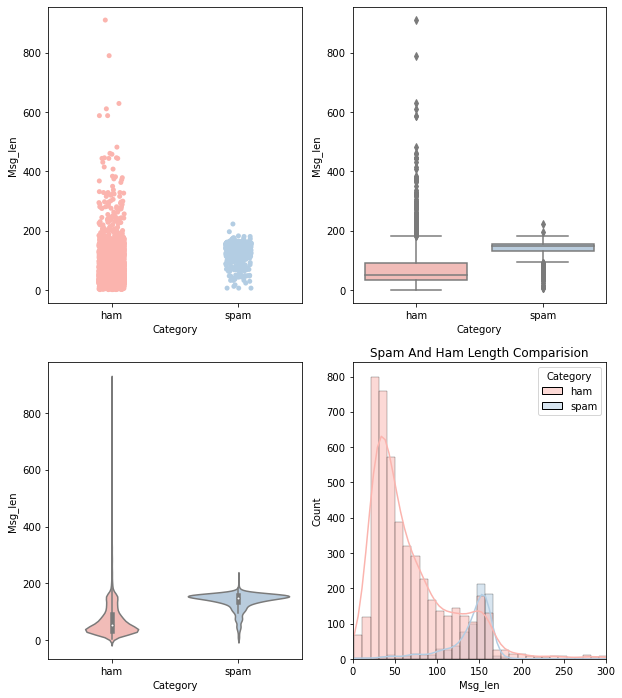

In [12]:
df["Msg_len"]=df["Message"].apply(len)
fig,axes=plt.subplots(2,2,figsize=(10,12))
sns.stripplot(data=df, y='Msg_len',x='Category', palette='Pastel1',ax=axes[0][0])
sns.boxplot(data=df,y='Msg_len',x='Category', palette='Pastel1',ax=axes[0][1])   
sns.violinplot(data=df,y='Msg_len',x='Category', palette='Pastel1',ax=axes[1][0]) 
sns.histplot(x=df["Msg_len"],hue=df["Category"],kde=True, palette='Pastel1',ax=axes[1][1])
plt.xlim(0,300)
plt.title("Spam And Ham Length Comparision")
plt.show()
    

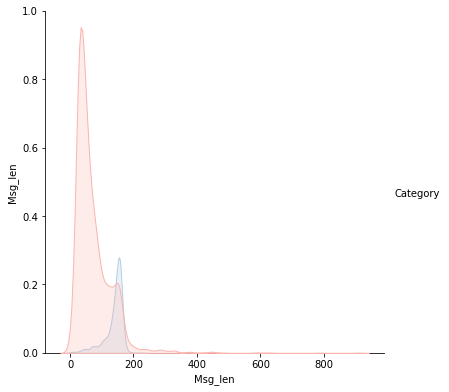

In [15]:
sns.set_palette("Paired")
sns.pairplot(df,hue='Category',height=5.5,palette='Pastel1')
plt.show()

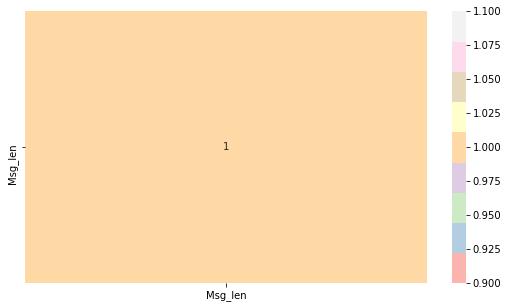

In [31]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True,cmap='Pastel1')
plt.show()

### Data Preprocessing

In [16]:
df.isna().sum()

Category    0
Message     0
Msg_len     0
dtype: int64

In [18]:
df.isna().any()

Category    False
Message     False
Msg_len     False
dtype: bool

In [24]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\SARAVANAN
[nltk_data]     DIVYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [28]:
# clean the messages
df['clean_text'] = df['Message'].apply(clean_text)
df.head()

,Category,Message,Msg_len,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goes usf lives around though


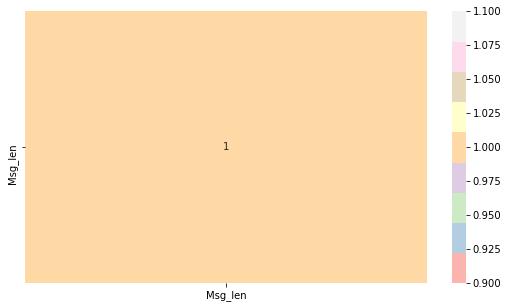

In [32]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),annot=True,cmap='Pastel1')
plt.show()

### Data Splitting

In [34]:
X = df['clean_text']
y = df['Category']

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [44]:
def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)

    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.estimators.plot_learning_curve(pipeline_model, X,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_lift_curve(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1)
    plt.show()
    print(classification_report(y_test, y_pred))

Accuracy: 96.55419956927494


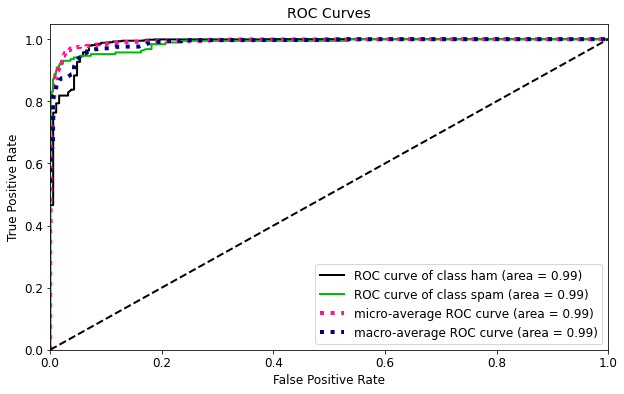

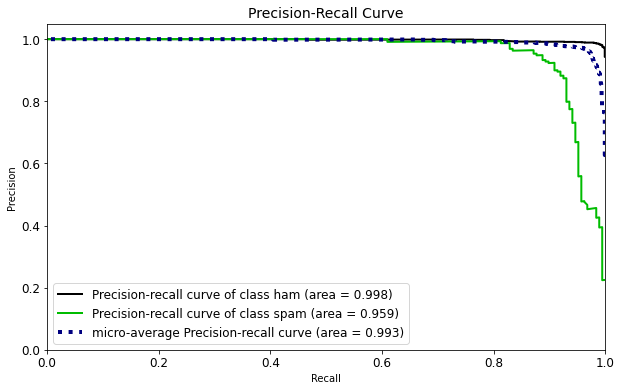

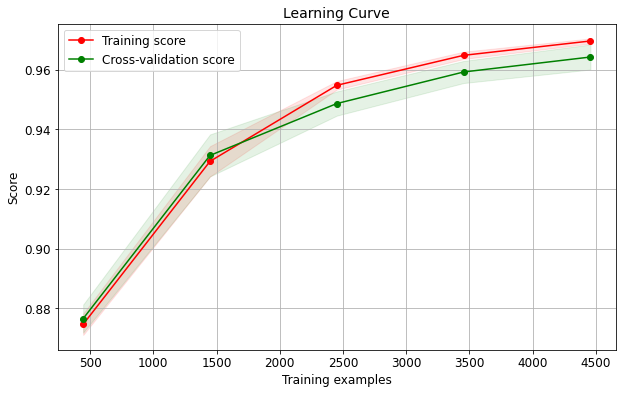

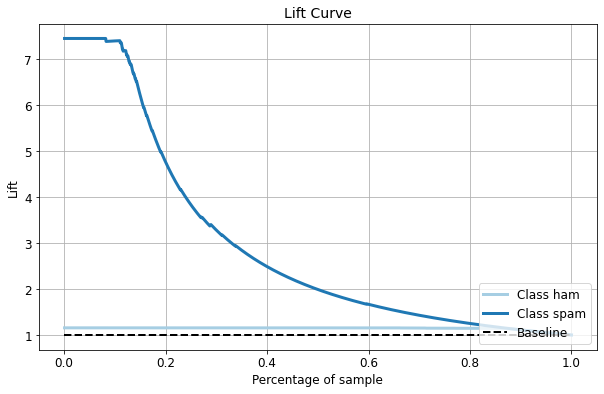

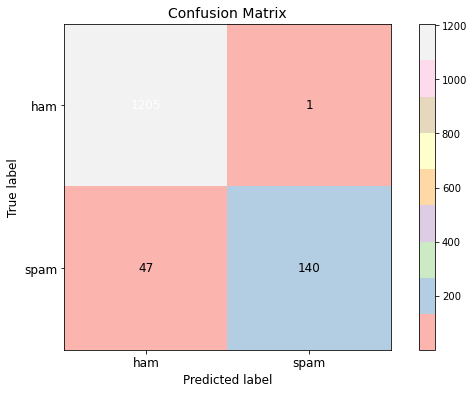

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       0.99      0.75      0.85       187

    accuracy                           0.97      1393
   macro avg       0.98      0.87      0.92      1393
weighted avg       0.97      0.97      0.96      1393



In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 92.24694903086863


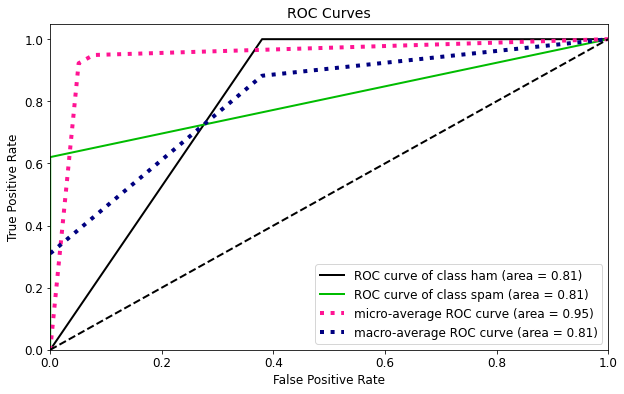

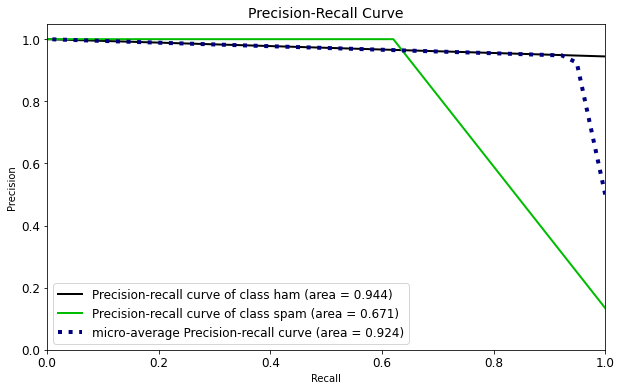

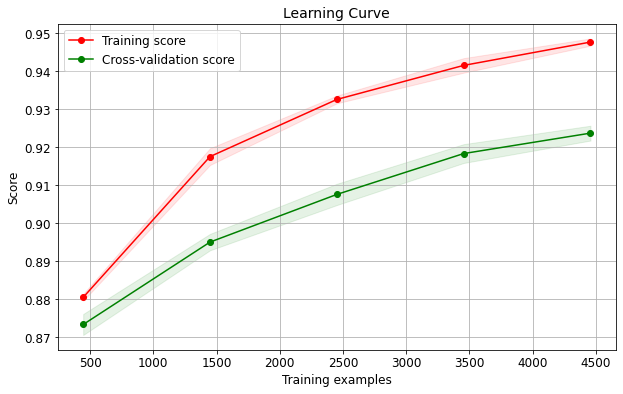

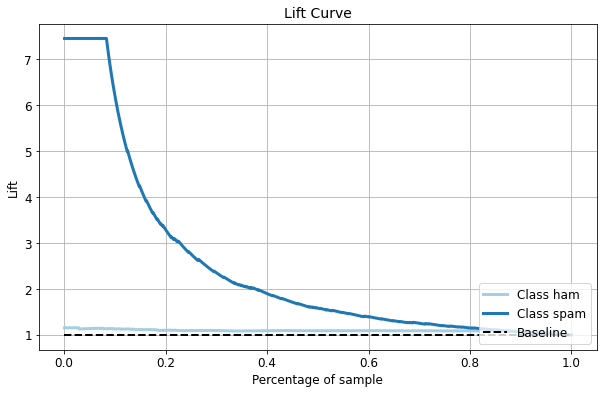

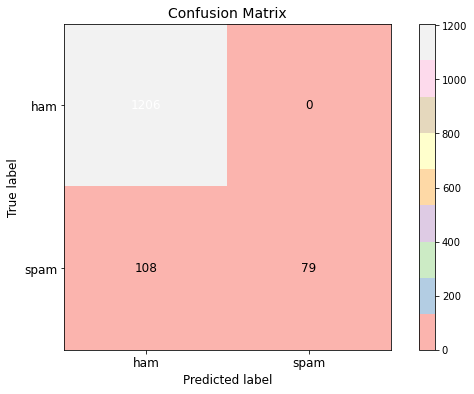

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96      1206
        spam       1.00      0.42      0.59       187

    accuracy                           0.92      1393
   macro avg       0.96      0.71      0.78      1393
weighted avg       0.93      0.92      0.91      1393



In [50]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=2)
classify(model,X,y)

Accuracy: 96.4824120603015


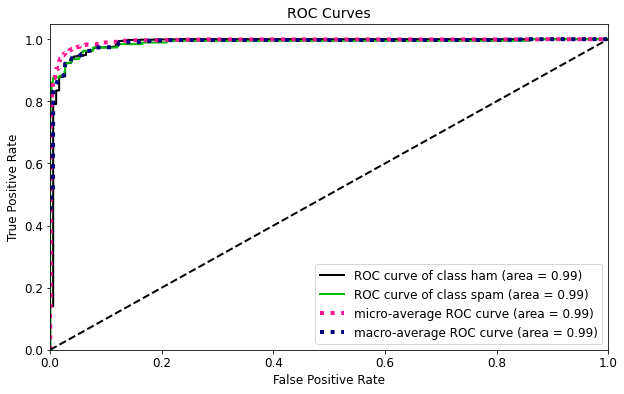

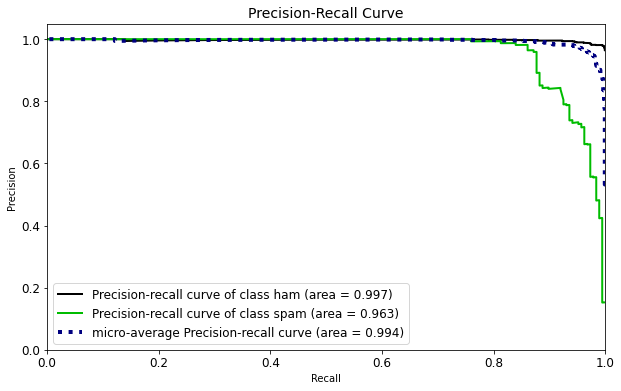

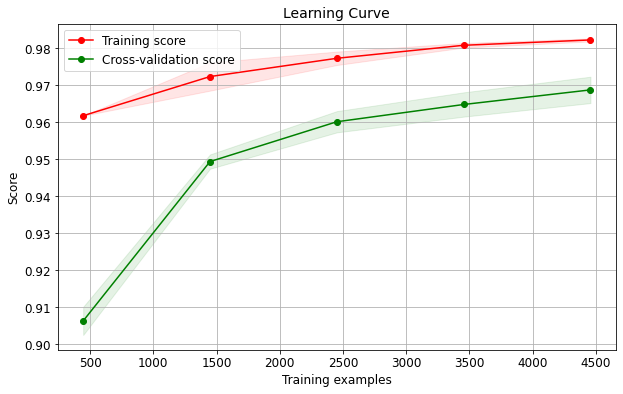

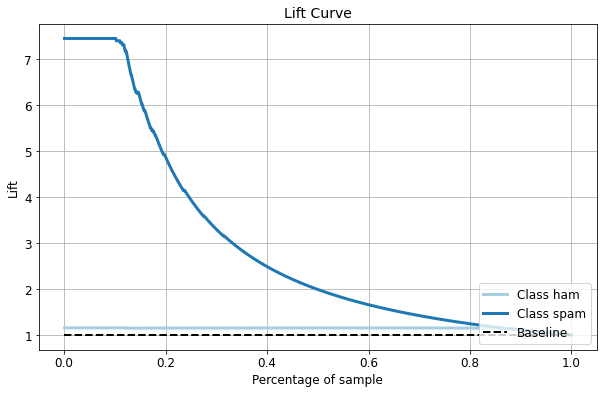

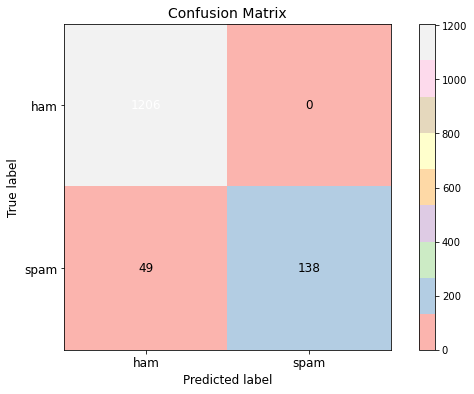

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1206
        spam       1.00      0.74      0.85       187

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.91      1393
weighted avg       0.97      0.96      0.96      1393



In [46]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)

Accuracy: 86.57573582196699


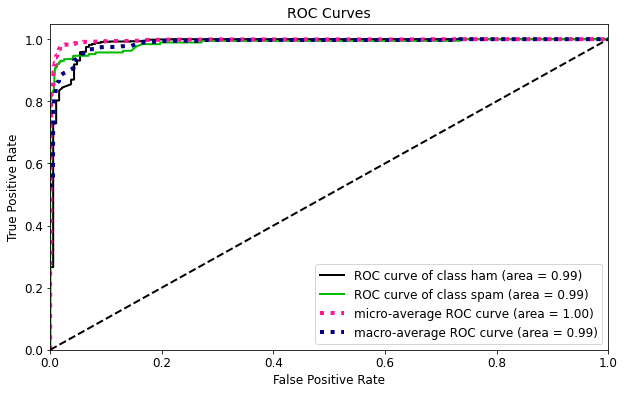

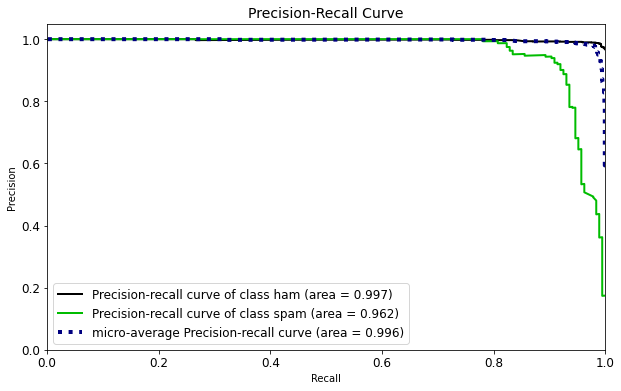

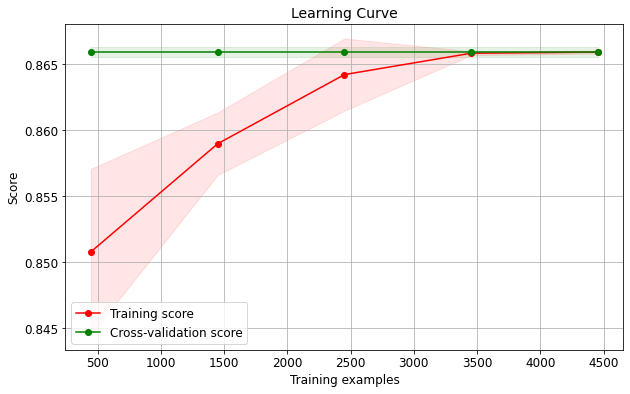

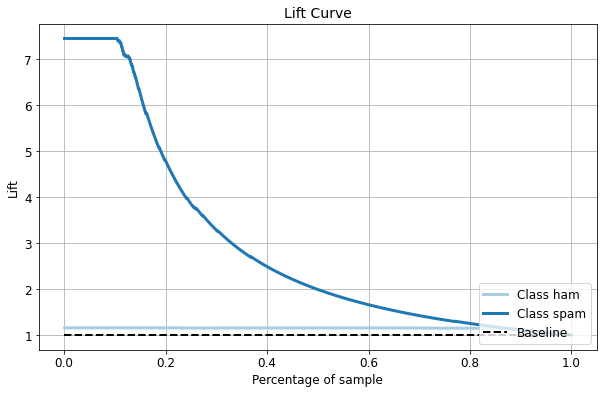

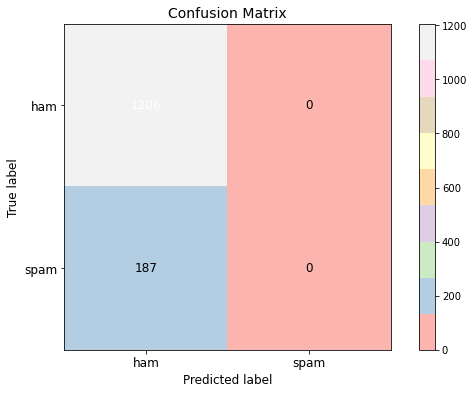

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      1206
        spam       0.00      0.00      0.00       187

    accuracy                           0.87      1393
   macro avg       0.43      0.50      0.46      1393
weighted avg       0.75      0.87      0.80      1393



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.svm import SVC
model = SVC(kernel='rbf',gamma=0.002,probability=True )
classify(model, X, y)

Accuracy: 97.48743718592965


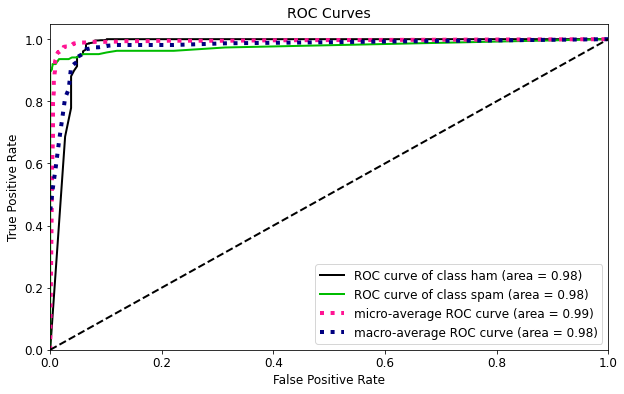

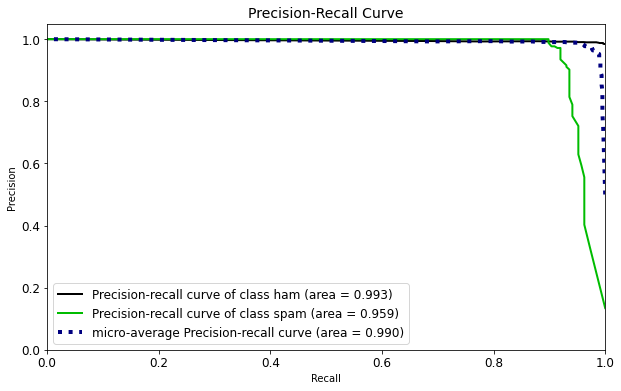

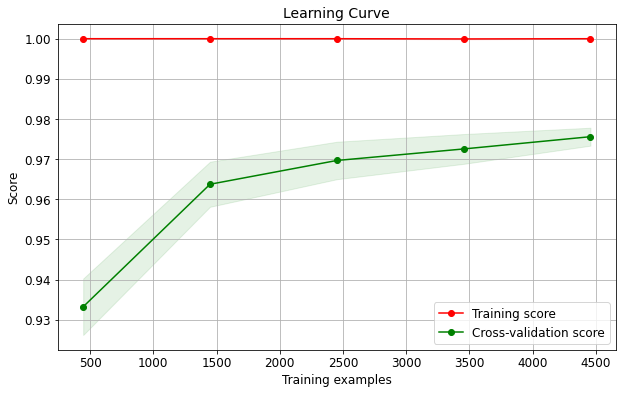

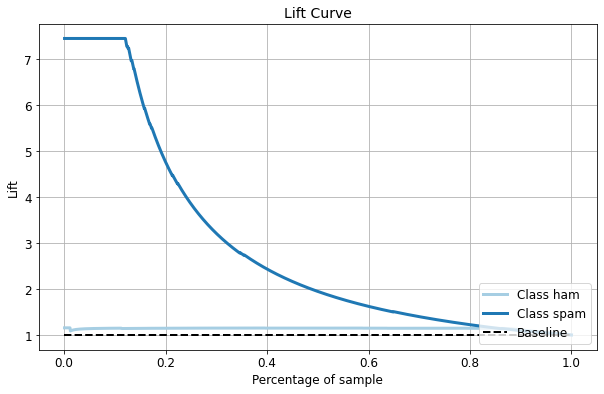

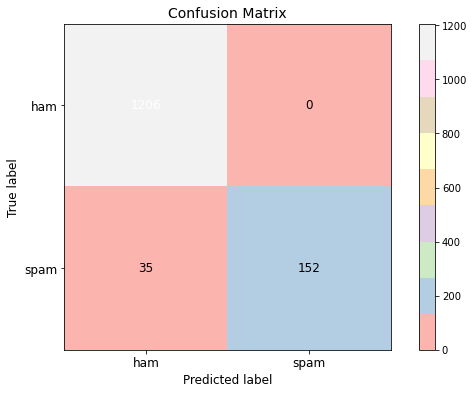

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1206
        spam       1.00      0.81      0.90       187

    accuracy                           0.97      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.98      0.97      0.97      1393



In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)